### Introduction

The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program.
For each passenger the data include information on their mileage history and on different ways they accrued or
spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics
for the purpose of targeting different segments for different types of mileage offers.

ID
Unique ID

Balance
Number of miles eligible for award travel

Qual_miles
Number of miles counted as qualifying for Topflight status

cc1_miles
Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles
Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles
Number of miles earned with Small Business credit card in the past 12 months:

Bonus_miles
Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans
Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo
Number of flight miles in the past 12 months

Flight_trans_12
Number of flight transactions in the past 12 months

Days_since_enroll
Number of days since enrolled in flier program

Award
Whether that person had award flight (free flight) or not

### Importing libraries

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Loading dataset

In [43]:
data = pd.read_csv("/content/drive/MyDrive/DS Course Uploads/Datasets/EastWestAirlines.csv")

In [44]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Summarising data

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [46]:
data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [47]:
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [48]:
data.duplicated().sum()

0

### Perform EDA

In [49]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [50]:
print(data.cc1_miles.value_counts())
print(data.cc2_miles.value_counts())
print(data.cc3_miles.value_counts())
print(data.Award.value_counts())

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64
cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64
cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64
Award
0    2518
1    1481
Name: count, dtype: int64


In [51]:
data.drop(['ID'], axis=1, inplace=True)

In [52]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


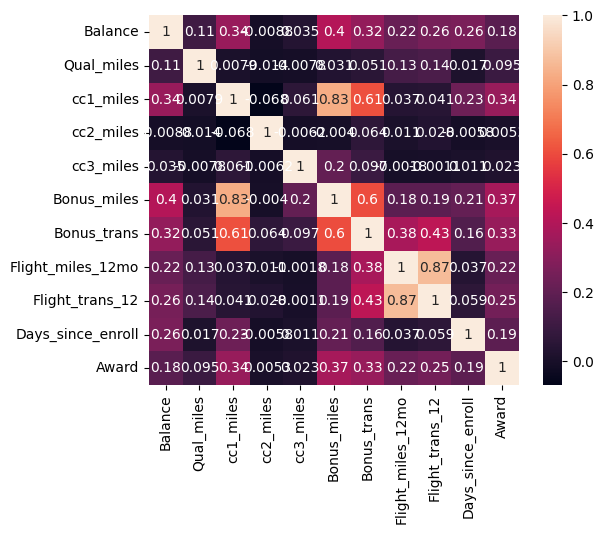

In [53]:
correlation_matrix = data.corr()
sns.heatmap(data = correlation_matrix, annot=True, square=True)
plt.show()

1. Bonus_miles and cc1_miles are strongly correlated
2. Flight_trans_12 and Flight_miles_12mo are strongly correlated

### Standardize data

In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [55]:
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

### Modelling

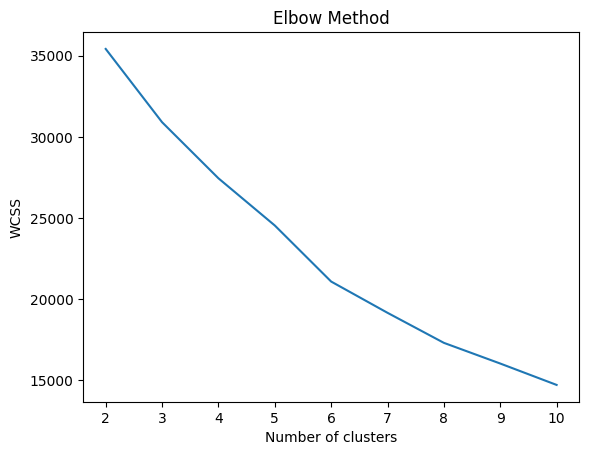

In [56]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Slopes at 3, 6, 8

In [78]:
clusters_new = KMeans(3, random_state=10, n_init=10)
clusters_new.fit(scaled_data)

KMeans(n_clusters=3, n_init=10, random_state=10)

In [79]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [80]:
data['cluster'] = clusters_new.labels_

In [81]:
data['cluster'].value_counts()

cluster
0    2578
1    1257
2     164
Name: count, dtype: int64

In [141]:
print(data.groupby('cluster').mean())
print(data.groupby('cluster').max())
print(data.groupby('cluster').min())
print(data.groupby('cluster').median())
print(data.groupby('cluster').std())
print(data[["cc1_miles", "cc2_miles", "cc3_miles", "cluster"]].groupby('cluster').apply(lambda col: col.mode()))

               Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                               
0         44362.713732   96.683088   1.237781   1.019007   1.000388   
1        117702.303103  158.010342   3.732697   1.002387   1.038186   
2        195200.231707  783.207317   2.152439   1.036585   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
0         4841.818852     7.017843         200.385958         0.625291   
1        40520.061257    18.995227         346.539379         1.026253   
2        31379.963415    26.993902        5412.000000        15.798780   

         Days_since_enroll     Award  
cluster                               
0              3706.255625  0.204810  
1              4886.218775  0.652347  
2              4715.945122  0.810976  
         Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \


### Visualization and generating inference

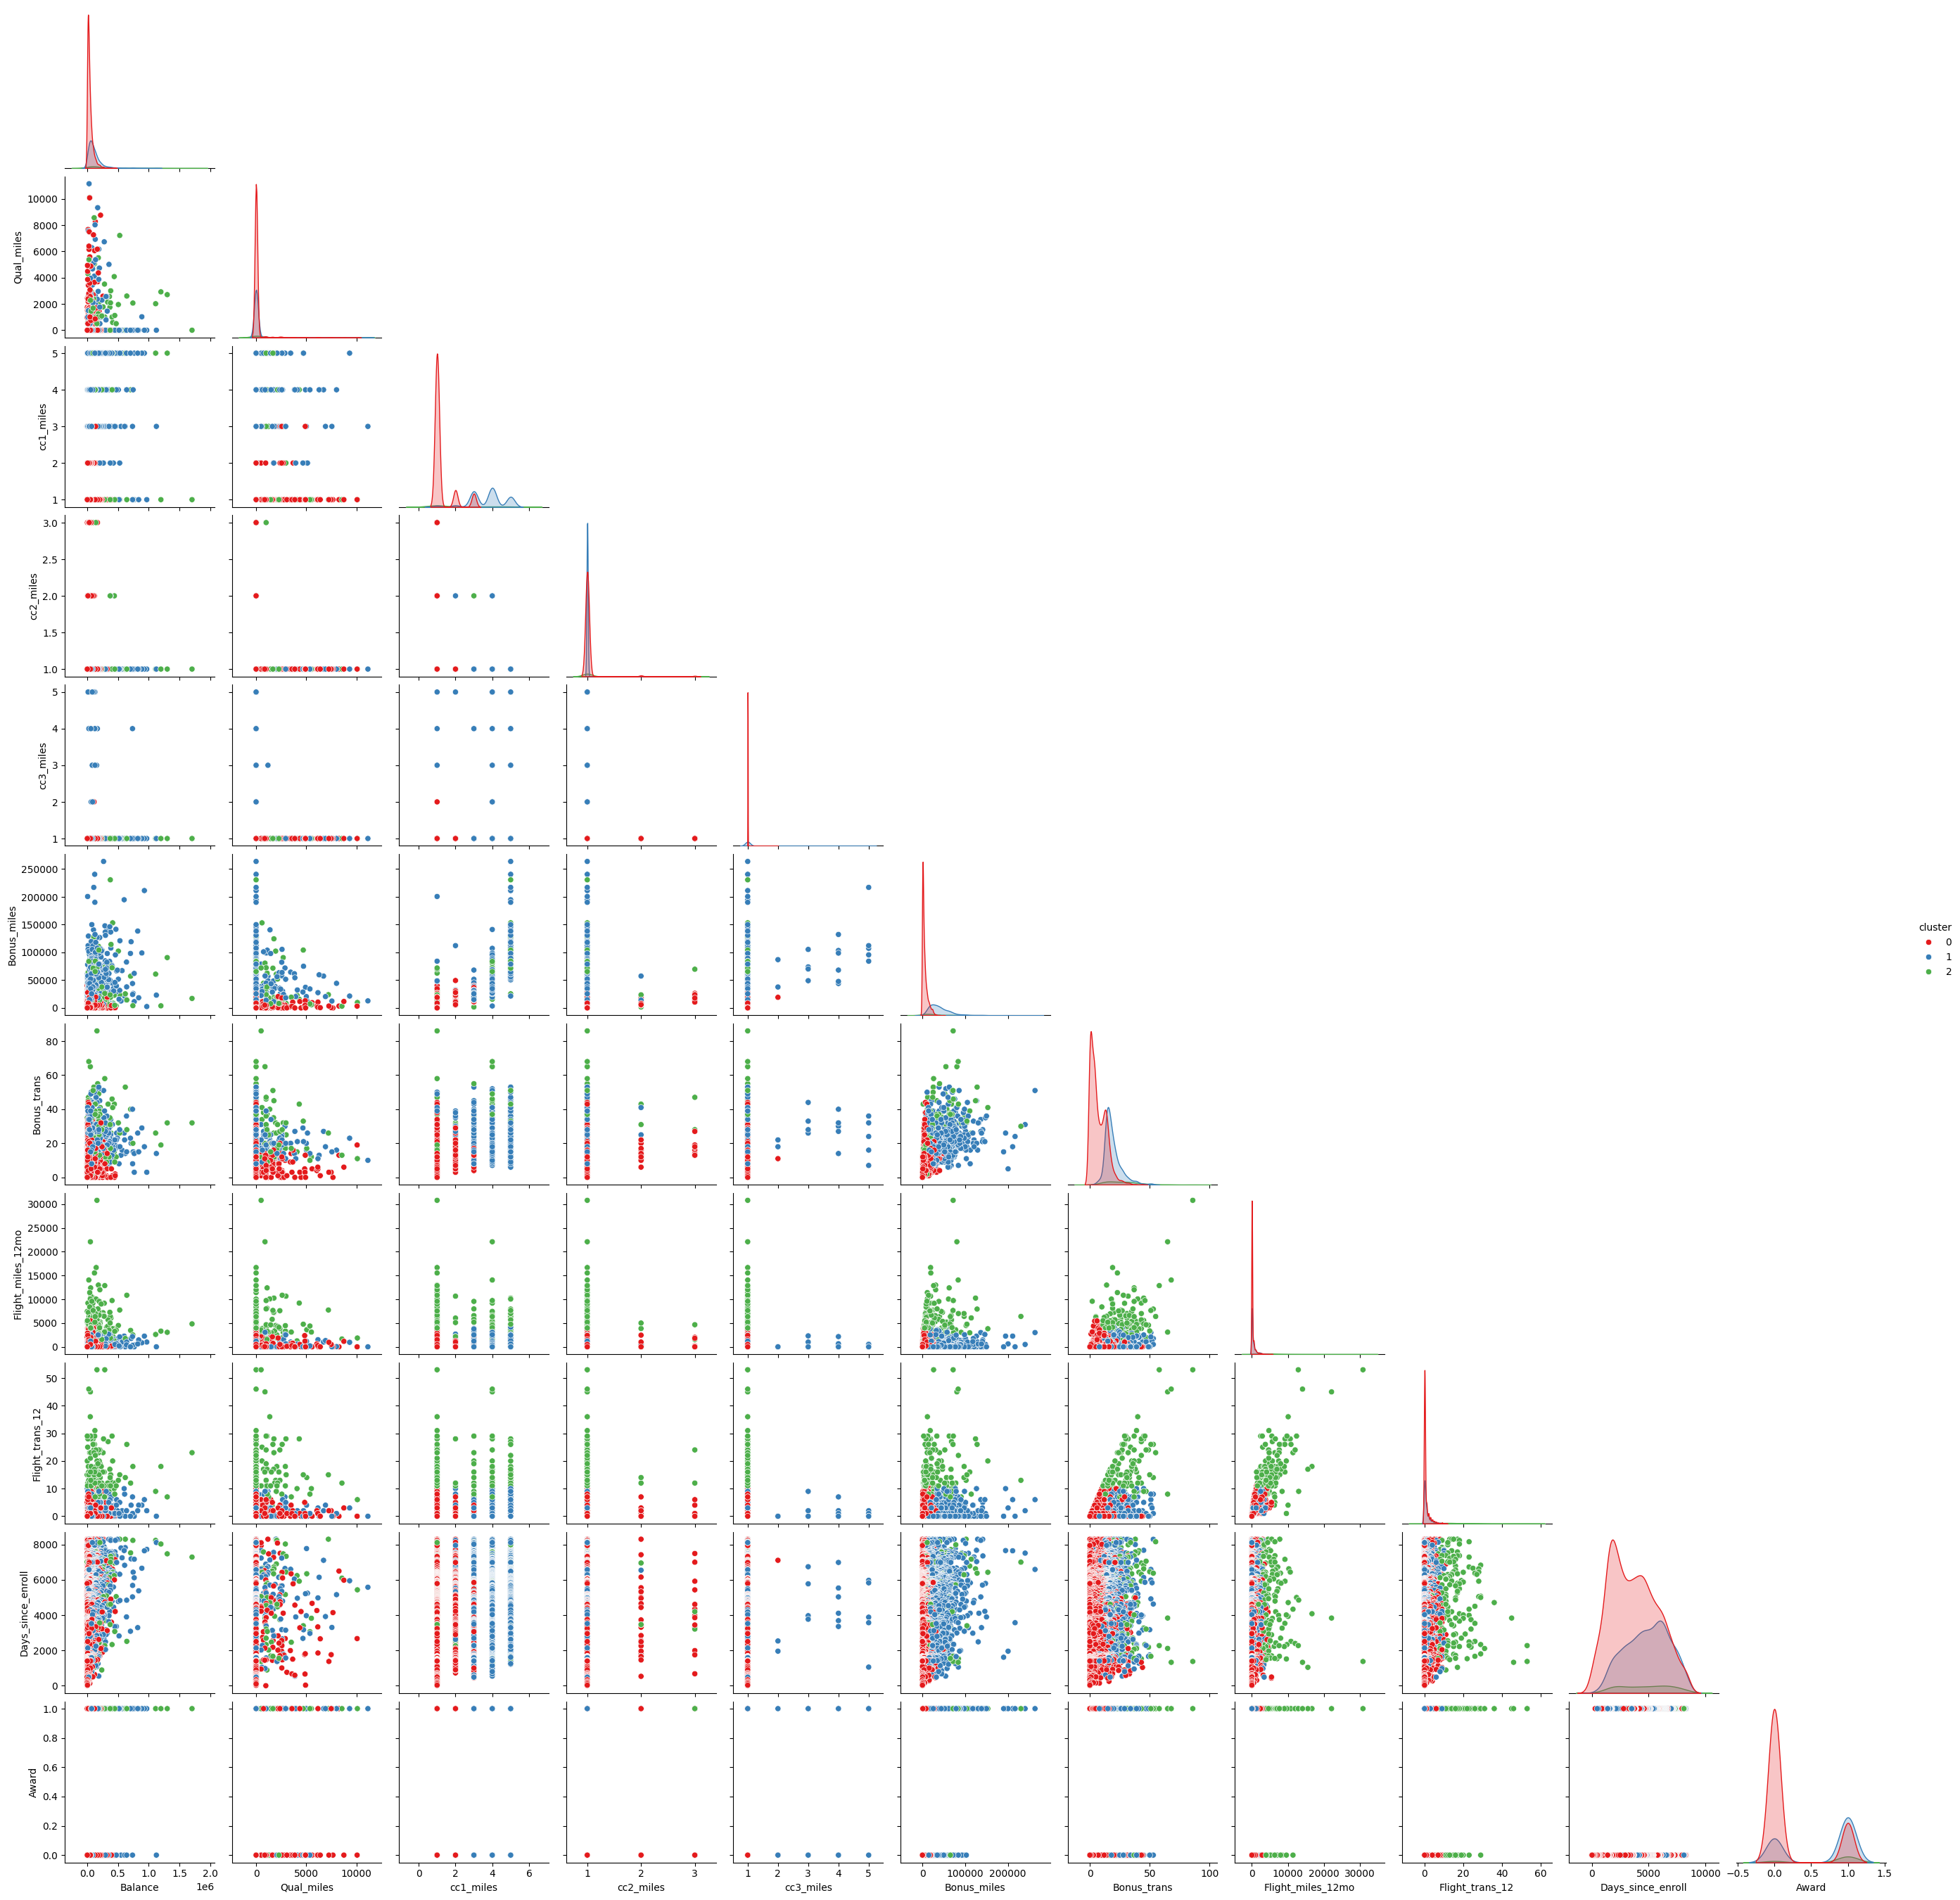

In [71]:
sns.pairplot(data, hue='cluster', palette='Set1', corner=True)
plt.show()

<Axes: xlabel='cc1_miles', ylabel='Bonus_miles'>

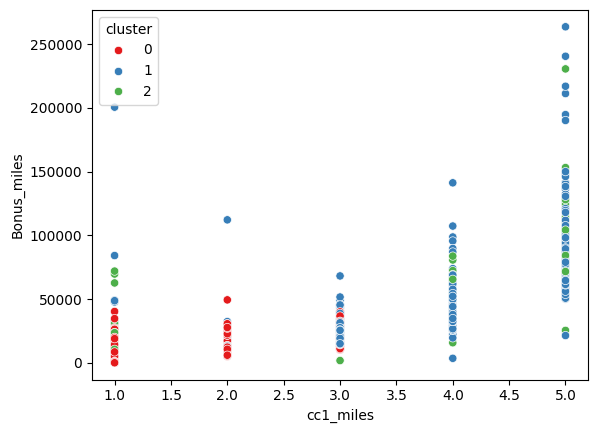

In [83]:
sns.scatterplot(data, x="cc1_miles", y="Bonus_miles", hue="cluster", palette="Set1")

<Axes: xlabel='cc1_miles', ylabel='Bonus_miles'>

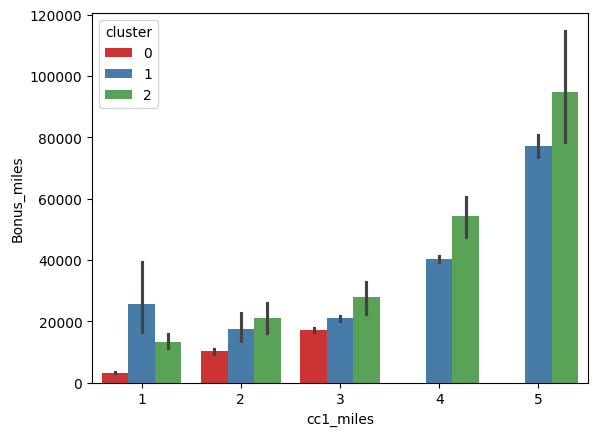

In [84]:
sns.barplot(data, x="cc1_miles", y="Bonus_miles", hue="cluster", palette="Set1")

<Axes: xlabel='Flight_miles_12mo', ylabel='Flight_trans_12'>

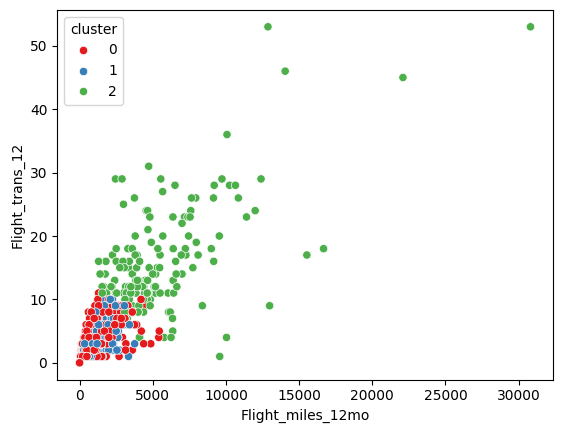

In [92]:
sns.scatterplot(data, x="Flight_miles_12mo", y="Flight_trans_12", hue="cluster", palette="Set1")

<Axes: xlabel='Flight_trans_12', ylabel='Flight_miles_12mo'>

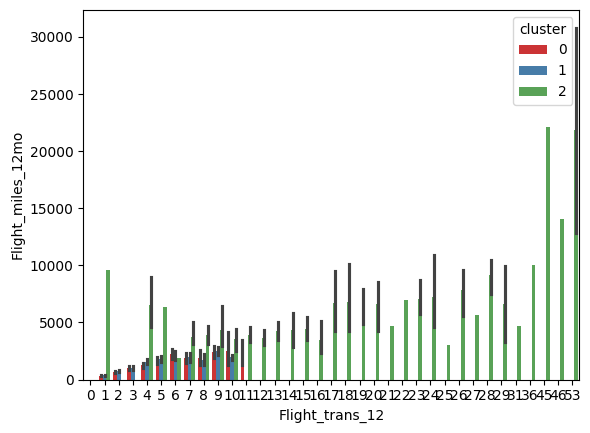

In [108]:
sns.barplot(data, x="Flight_trans_12", y="Flight_miles_12mo", hue="cluster", palette="Set1")

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
 11  cluster            3999 non-null   int32
dtypes: int32(1), int64(11)
memory usage: 359.4 KB


<Axes: xlabel='Award', ylabel='Balance'>

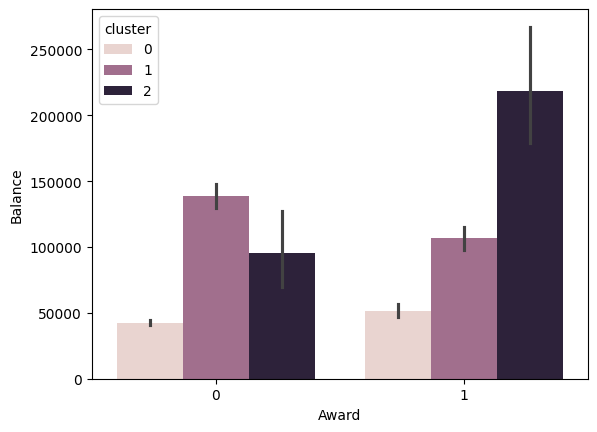

In [131]:
sns.barplot(data, x="Award", y="Balance", hue="cluster")

<Axes: xlabel='Award', ylabel='cc1_miles'>

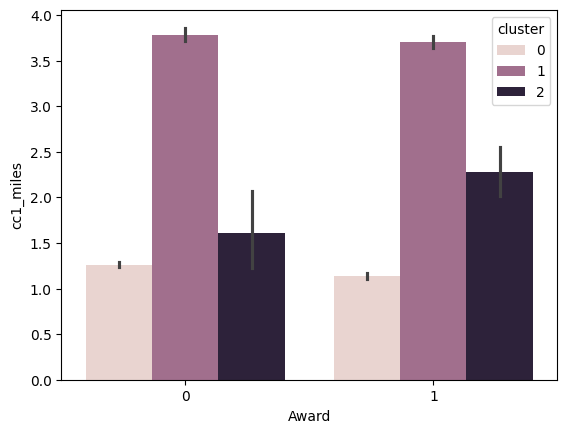

In [136]:
sns.barplot(data, x="Award", y="cc1_miles", hue="cluster")

<Axes: xlabel='Award', ylabel='cc2_miles'>

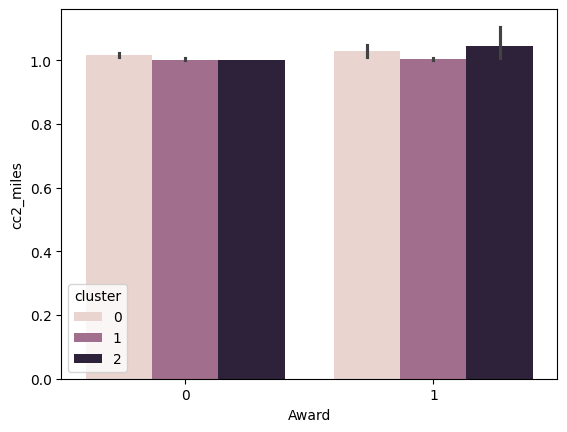

In [134]:
sns.barplot(data, x="Award", y="cc2_miles", hue="cluster")

<Axes: xlabel='Award', ylabel='cc3_miles'>

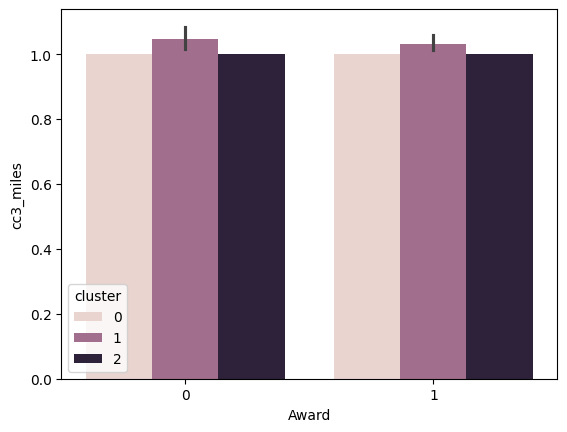

In [135]:
sns.barplot(data, x="Award", y="cc3_miles", hue="cluster")

### Summary

1. Cluster 0
  * Lowest balanced miles mean 44k
  * Lowest qualifying miles mean 96
  * Lowest Bonus trans mean 7
  * Lowest flight miles in last year mean 200
  * Lowest Bonus miles mean 4800
  * Lowest cc1_miles avg 1


2. Cluster 1
	* Medium balanced miles mean 117k
	* Medium qualifying miles mean 158
	* Medium Bonus trans mean 18, much more than C0
	* Medium flight miles in last year mean 350
	* Highest Bonus miles mean 40k
	* Highest cc1_miles avg 3 max 5



3. Cluster 2
	* Highest balanced miles mean 195k
	* Highest qualifying miles mean 783(lot of difference)
	* Highest Bonus trans mean 26
	* Highest flight miles in last year mean 5412(very high)
	* Medium Bonus miles mean 30k
	* Medium cc1_miles avg 2 max 5
	* Highest flight transactions in last year